In [456]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, confusion_matrix

%matplotlib inline
sns.set(style="ticks", color_codes=True)

In [457]:
df = pd.read_csv("bank-full.csv")
df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [458]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
Target       45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [459]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [460]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'Target'],
      dtype='object')

In [461]:
for col in df.select_dtypes(include='object').columns:
    print(col)
    print(df[col].unique())

job
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital
['married' 'single' 'divorced']
education
['tertiary' 'secondary' 'unknown' 'primary']
default
['no' 'yes']
housing
['yes' 'no']
loan
['no' 'yes']
contact
['unknown' 'cellular' 'telephone']
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome
['unknown' 'failure' 'other' 'success']
Target
['no' 'yes']


In [462]:
df.apply(lambda x: sum(x.isnull()))

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

In [463]:
df = df[df['job'] != 'unknown']
df = df[df['contact'] != 'unknown']
df = df[df['education'] != 'unknown']


for col in df.select_dtypes(include='object').columns:
    print(col)
    print(df[col].unique())
df.describe().transpose()

job
['management' 'blue-collar' 'technician' 'services' 'admin.' 'unemployed'
 'entrepreneur' 'housemaid' 'retired' 'self-employed' 'student']
marital
['single' 'married' 'divorced']
education
['secondary' 'primary' 'tertiary']
default
['no' 'yes']
housing
['no' 'yes']
loan
['no' 'yes']
contact
['cellular' 'telephone']
month
['jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'may' 'jun' 'sep']
poutcome
['unknown' 'failure' 'other' 'success']
Target
['no' 'yes']


,count,mean,std,min,25%,50%,75%,max
age,30907.0,40.918918,10.922583,18.0,32.0,39.0,48.0,95.0
balance,30907.0,1425.760701,3190.967030,-8019.0,80.0,473.0,1502.5,102127.0
day,30907.0,15.967257,8.226736,1.0,9.0,16.0,21.0,31.0
duration,30907.0,260.485003,257.783963,0.0,104.0,181.0,322.0,4918.0
campaign,30907.0,2.751318,2.954412,1.0,1.0,2.0,3.0,50.0
pdays,30907.0,55.944835,112.726930,-1.0,-1.0,-1.0,10.0,871.0
previous,30907.0,0.808490,2.706169,0.0,0.0,0.0,1.0,275.0


In [464]:
df['Target'].value_counts()

no     26394
yes     4513
Name: Target, dtype: int64

In [465]:
pct_neg1=(df[df['pdays'] == -1].shape[0]/df.shape[0])*100

pct_neg1


74.6109295628822

There are 74% of the 'pday' column with value of '-1'. It is significant and shall not be clean

In [466]:
df['day_group'] = pd.cut(df['day'],
                   bins=5)

df['day_group']
df= df.drop(['day'],axis=1)

#count_days_response_pct = pd.crosstab(df['Target'],df['day_group']).apply(lambda x: x/x.sum() * 100)
#count_days_response_pct = count_days_response_pct.T

#count_pdays_response_pct

In [467]:
df.loc[df["pdays"] == -1,  'pdays_group'] = 'unknown'
df.loc[(df["pdays"] >= 0) & (df["pdays"] < 200), 'pdays_group'] =  '0-199'
df.loc[(df["pdays"] >= 200) & (df["pdays"] < 400), 'pdays_group'] = '200-399'
df.loc[(df["pdays"] >= 400) & (df["pdays"] < 600), 'pdays_group'] = '400-599'
df.loc[(df["pdays"] >= 600) & (df["pdays"] < 800), 'pdays_group'] = '600-799'
df.loc[(df["pdays"] >= 800) , 'pdays_group'] = '800+'
df= df.drop(['pdays'],axis=1)

count_pdays_response_pct = pd.crosstab(df['Target'],df['pdays_group']).apply(lambda x: x/x.sum() * 100)
count_pdays_response_pct = count_pdays_response_pct.T

count_pdays_response_pct

Target,no,yes
pdays_group,,
0-199,68.510324,31.489676
200-399,88.864143,11.135857
400-599,42.675159,57.324841
600-799,45.454545,54.545455
800+,37.500000,62.500000
unknown,88.183001,11.816999


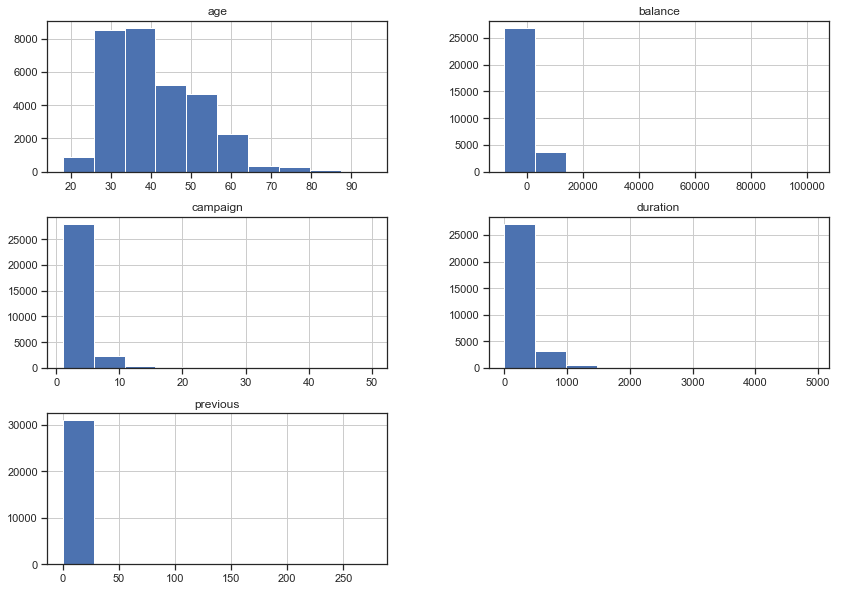

In [468]:
# Let's see how the numeric data is distributed.
import matplotlib.pyplot as plt

df.hist(figsize=(14,10))
plt.show()

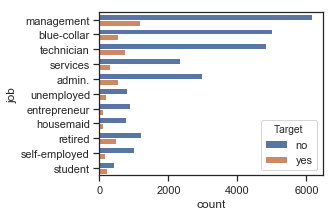

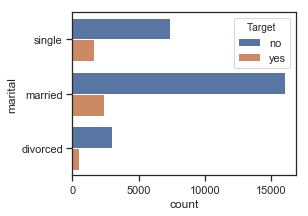

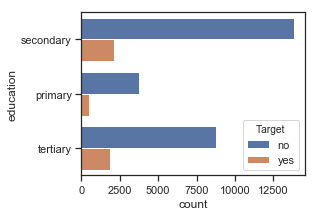

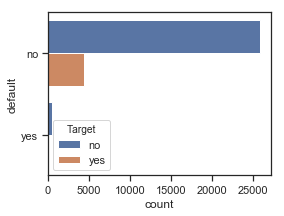

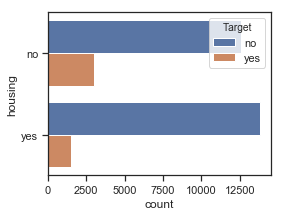

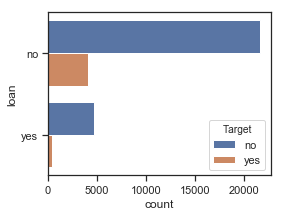

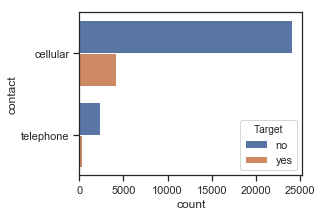

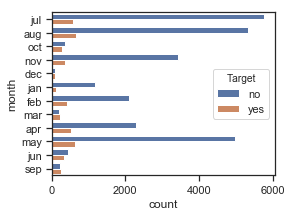

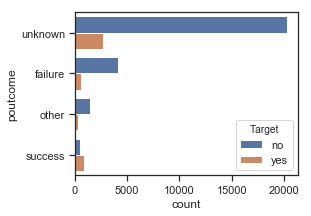

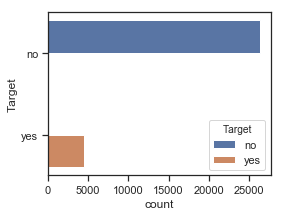

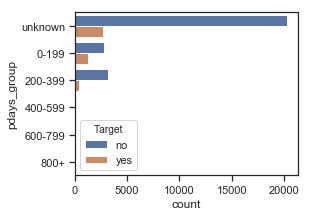

In [469]:
object_bol = df.dtypes =='object'

for x,t in enumerate(df.dtypes[object_bol].index):
    plt.figure(figsize=(4,3))
    
    sns.countplot(y=t, hue="Target",data=df)  

[Text(0, 0, 'management'),
 Text(0, 0, 'blue-collar'),
 Text(0, 0, 'technician'),
 Text(0, 0, 'services'),
 Text(0, 0, 'admin.'),
 Text(0, 0, 'unemployed'),
 Text(0, 0, 'entrepreneur'),
 Text(0, 0, 'housemaid'),
 Text(0, 0, 'retired'),
 Text(0, 0, 'self-employed'),
 Text(0, 0, 'student')]

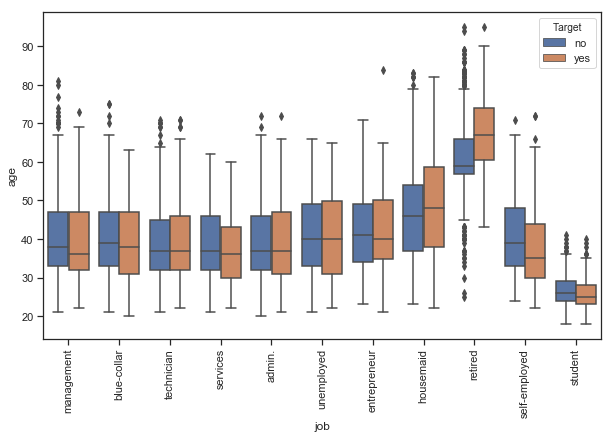

In [470]:
plt.figure(figsize=(10,6))
ax = sns.boxplot(y='age', x='job', hue='Target',data=df)
ax.set_xticklabels(df["job"].unique(), rotation=90)

Text(0.5, 1.0, 'Amount of Balance by Term Suscriptions')

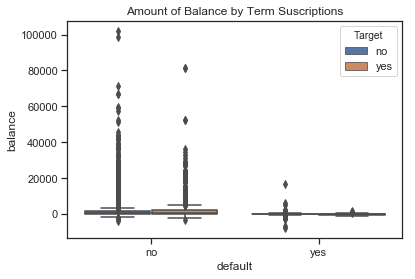

In [401]:
g = sns.boxplot(x="default", y="balance", hue="Target", data=df)
g.set_title("Amount of Balance by Term Suscriptions")

- Observed that when default is no and Target is no, there are lots of outliers 

Text(0.5, 1.0, 'Type of Work by Term Suscriptions')

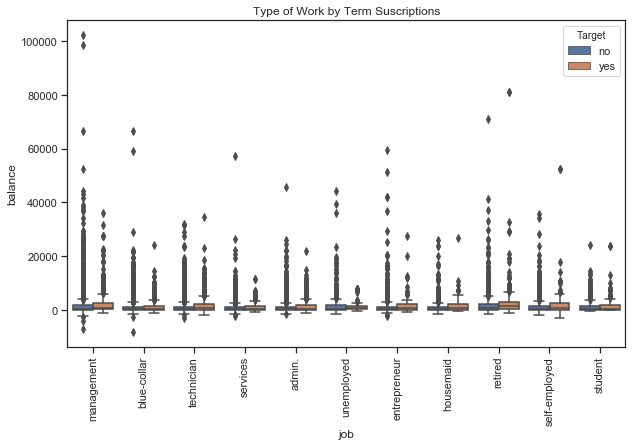

In [366]:
plt.figure(figsize=(10,6))
g1 = sns.boxplot(x="job", y="balance", hue="Target", data=df)

g1.set_xticklabels(df["job"].unique(), rotation=90)
g1.set_title("Type of Work by Term Suscriptions")

Text(0.5, 1.0, 'Distribution of Balance by Education')

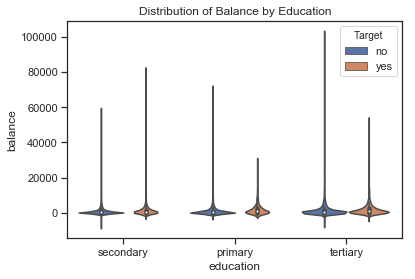

In [367]:
g2 = sns.violinplot(data=df, x="education", y="balance", hue="Target")
g2.set_title("Distribution of Balance by Education")

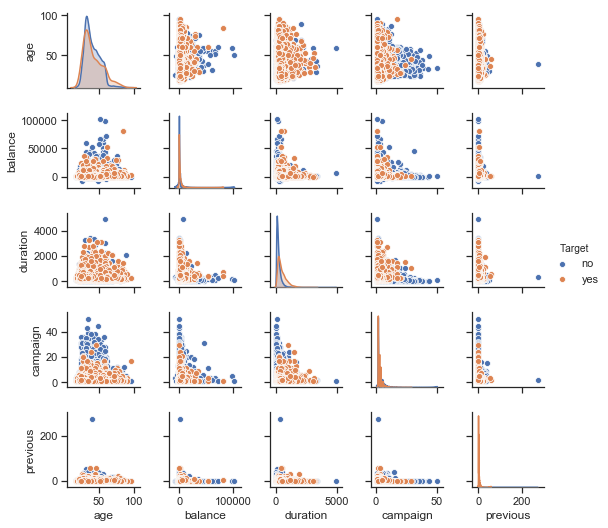

In [368]:
sns.pairplot(df, hue='Target', height=1.5)

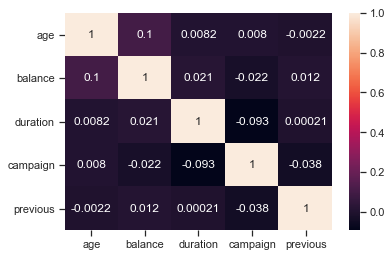

In [369]:
sns.heatmap(df.corr(method='pearson'), annot=True)

- Observed that pdays and previous is highly correlated

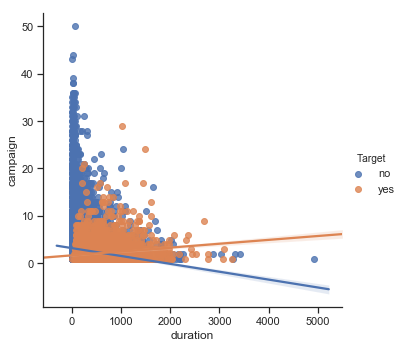

In [434]:
dur_cam = sns.lmplot(x='duration', y='campaign',data = df,hue = 'Target')

plt.show()

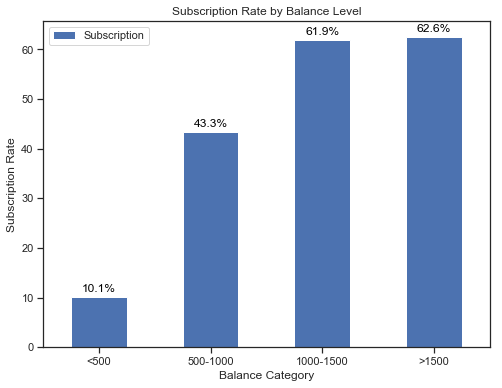

In [471]:
df.loc[df["duration"] < 500,  'duration_group'] = '<500'
df.loc[(df["duration"] >= 500) & (df["duration"] <= 1000), 'duration_group'] =  '500-1000'
df.loc[(df["duration"] >= 1000) & (df["duration"] <= 1500), 'duration_group'] = '1000-1500'
df.loc[(df["duration"] > 1500) , 'duration_group'] = '>1500'
df= df.drop(['duration'],axis=1)


count_duration_response_pct = pd.crosstab(df['Target'],df['duration_group']).apply(lambda x: x/x.sum() * 100)
count_duration_response_pct = count_duration_response_pct.T

dur = pd.DataFrame(df['duration_group'].value_counts())
dur['Subscription'] = count_duration_response_pct['yes']
dur.drop('duration_group',axis = 1,inplace = True)

#bal['bal'] = [1,2,0,4,3]
#bal = bal.sort_values('bal',ascending = True)

plot_balance = dur[['Subscription']].plot(kind = 'bar',figsize = (8,6))

plot_balance.set_title('Subscription Rate by Balance Level')
plt.ylabel('Subscription Rate')
plt.xlabel('Balance Category')
plt.xticks(rotation = 'horizontal')

# label the bar
for rec, label in zip(plot_balance.patches,
                      dur['Subscription'].round(1).astype(str)):
    plot_balance.text(rec.get_x() + rec.get_width()/2, 
                      rec.get_height() + 1, 
                      label+'%',  
                      ha = 'center', 
                      color = 'black')

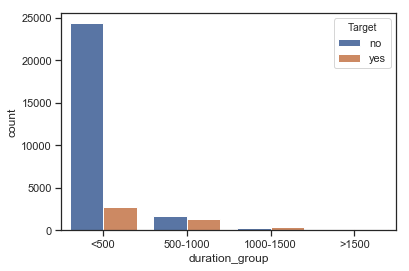

In [472]:
sns.countplot(x="duration_group",hue="Target", data=df)

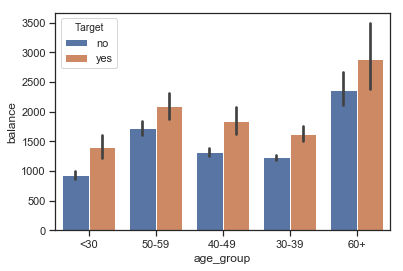

In [473]:
df.loc[df["age"] < 30,  'age_group'] = '<30'
df.loc[(df["age"] >= 30) & (df["age"] <= 39), 'age_group'] =  '30-39'
df.loc[(df["age"] >= 40) & (df["age"] <= 49), 'age_group'] = '40-49'
df.loc[(df["age"] >= 50) & (df["age"] <= 59), 'age_group'] = '50-59'
df.loc[df["age"] >= 60, 'age_group'] = '60+'
df= df.drop(['age'],axis=1)
#df['age'] = [30,40,50,20,60]
#df = age.sort_values('age',ascending = True)

sns.barplot(x="age_group", y="balance",hue="Target", data=df)
#plt.xticks(np.arange(5), ('<30', '30-39', '40-49', '50-59', '60+'),rotation = 'horizontal')

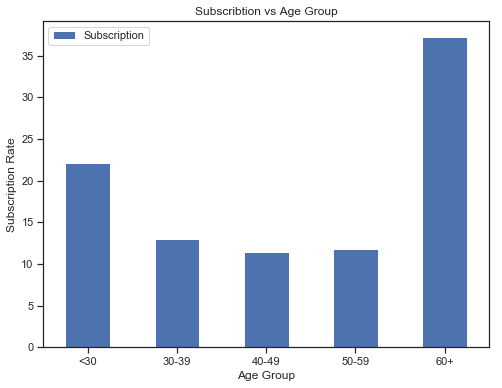

In [474]:
import matplotlib.pyplot as plt

count_age_response_pct = pd.crosstab(df['Target'],df['age_group']).apply(lambda x: x/x.sum() * 100)
count_age_response_pct = count_age_response_pct.T
age = pd.DataFrame(df['age_group'].value_counts())
age['Subscription'] = count_age_response_pct['yes']
age.drop('age_group',axis = 1,inplace = True)

age['age'] = [30,40,50,20,60]
age = age.sort_values('age',ascending = True)

plot_age = age[['Subscription']].plot(kind = 'bar',
                                              figsize=(8,6))
plt.xlabel('Age Group')
plt.ylabel('Subscription Rate')
plt.xticks(np.arange(5), ('<30', '30-39', '40-49', '50-59', '60+'),rotation = 'horizontal')
plot_age.set_title("Subscribtion vs Age Group")

# label the bar
for rec, label in zip(plot_age.patches,
                      age['Subscription'].round(1).astype(str)):
    plot_balance.text(rec.get_x() + rec.get_width()/2, 
                      rec.get_height() + 0.25, 
                      label+'%',  
                      ha = 'center', 
                      color = 'black')

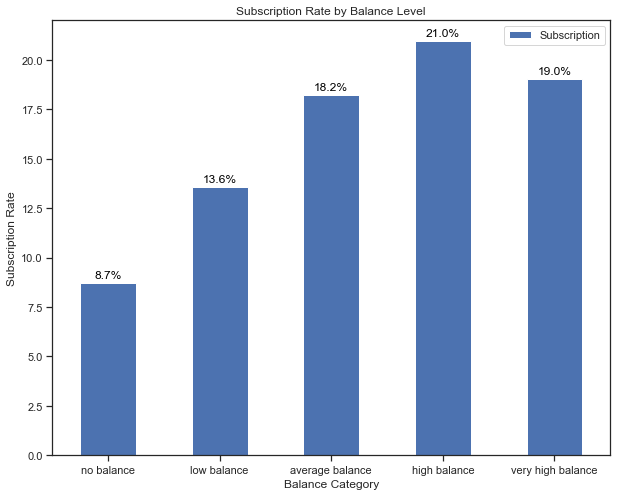

In [475]:
df.loc[df["balance"] <= 0,  'balance_group'] = 'no balance'
df.loc[(df["balance"] > 0) & (df["balance"] <= 1000), 'balance_group'] = 'low balance'
df.loc[(df["balance"] > 1000) & (df["balance"] <= 3000), 'balance_group'] = 'average balance'
df.loc[(df["balance"] > 3000) & (df["balance"] <= 5000), 'balance_group'] = 'high balance'
df.loc[(df["balance"] > 5000), 'balance_group'] = 'very high balance'
df= df.drop(['balance'],axis=1)
count_balance_response_pct = pd.crosstab(df['Target'],df['balance_group']).apply(lambda x: x/x.sum() * 100)
count_balance_response_pct = count_balance_response_pct.T

bal = pd.DataFrame(df['balance_group'].value_counts())
bal['Subscription'] = count_balance_response_pct['yes']
bal.drop('balance_group',axis = 1,inplace = True)

bal['bal'] = [1,2,0,4,3]
bal = bal.sort_values('bal',ascending = True)

plot_balance = bal[['Subscription']].plot(kind = 'bar',figsize = (10,8))

plot_balance.set_title('Subscription Rate by Balance Level')
plt.ylabel('Subscription Rate')
plt.xlabel('Balance Category')
plt.xticks(rotation = 'horizontal')

# label the bar
for rec, label in zip(plot_balance.patches,
                      bal['Subscription'].round(1).astype(str)):
    plot_balance.text(rec.get_x() + rec.get_width()/2, 
                      rec.get_height() + 0.25, 
                      label+'%',  
                      ha = 'center', 
                      color = 'black')

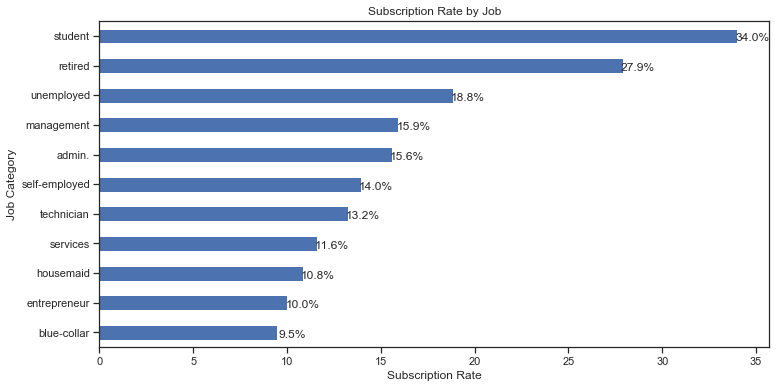

In [476]:
count_job_response_pct = pd.crosstab(df['Target'],df['job']).apply(lambda x: x/x.sum() * 100)
count_job_response_pct = count_job_response_pct.transpose()
plot_job = count_job_response_pct['yes'].sort_values(ascending = True).plot(kind ='barh',
                                                                           figsize = (12,6))
                                                                               
plot_job.set_title('Subscription Rate by Job')
plt.xlabel('Subscription Rate')
plt.ylabel('Job Category')

# Label each bar
for rec, label in zip(plot_job.patches,
                      count_job_response_pct['yes'].sort_values(ascending = True).round(1).astype(str)):
    plot_job.text(rec.get_width()+0.8, 
                  rec.get_y()+ rec.get_height()-0.5, 
                  label+'%', 
                  ha = 'center', 
                  va='bottom')

In [477]:
df.loc[df["month"] == 'jan',  'quarter'] = 'Q1'
df.loc[df["month"] == 'feb',  'quarter'] = 'Q1'
df.loc[df["month"] == 'mar',  'quarter'] = 'Q1'

df.loc[df["month"] == 'apr',  'quarter'] = 'Q2'
df.loc[df["month"] == 'may',  'quarter'] = 'Q2'
df.loc[df["month"] == 'jun',  'quarter'] = 'Q2'

df.loc[df["month"] == 'jul',  'quarter'] = 'Q3'
df.loc[df["month"] == 'aug',  'quarter'] = 'Q3'
df.loc[df["month"] == 'sep',  'quarter'] = 'Q3'

df.loc[df["month"] == 'oct',  'quarter'] = 'Q4'
df.loc[df["month"] == 'nov',  'quarter'] = 'Q4'
df.loc[df["month"] == 'dec',  'quarter'] = 'Q4'
df= df.drop(['month'],axis=1)

In [478]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm

le = LabelEncoder()
# train the encoder with the label data
#Transform
df_ytransformed=le.fit_transform(df['Target'])


y = df_ytransformed
df = df.drop(['Target'], axis=1)

from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
df = pd.get_dummies(df, prefix_sep='_', drop_first=True)

X = df



In [479]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=100)
X_train[0:5]

,campaign,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,...,age_group_50-59,age_group_60+,age_group_<30,balance_group_high balance,balance_group_low balance,balance_group_no balance,balance_group_very high balance,quarter_Q2,quarter_Q3,quarter_Q4
43690,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
38496,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0
33859,7,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0
43970,3,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,1,1,0,0
32732,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0


              precision    recall  f1-score   support

           0       0.92      0.90      0.91      7940
           1       0.46      0.52      0.49      1333

   micro avg       0.84      0.84      0.84      9273
   macro avg       0.69      0.71      0.70      9273
weighted avg       0.85      0.84      0.85      9273



0.8449261296236386

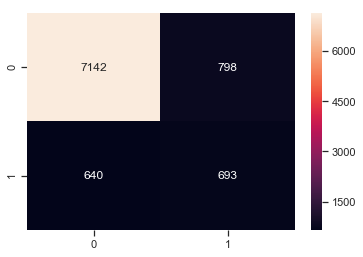

In [480]:
from sklearn.naive_bayes import GaussianNB

naive_model = GaussianNB()
naive_model.fit(X_train, y_train)

y_pred = naive_model.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix, annot=True,fmt='d')

naive_score = naive_model.score(X_test, y_test)

from sklearn.metrics import  classification_report
print (classification_report(y_test, y_pred))
#print('Precision Score: ', precision_score(y_test, pred_naive))
# The classifier only detects 60% of potential clients that will suscribe to a term deposit.
#print('Recall Score: ', recall_average)
naive_score
#pred_naive.shape
#y_test.shape

              precision    recall  f1-score   support

           0       0.89      0.97      0.93      7940
           1       0.63      0.31      0.42      1333

   micro avg       0.88      0.88      0.88      9273
   macro avg       0.76      0.64      0.67      9273
weighted avg       0.86      0.88      0.86      9273



0.8750134799956863

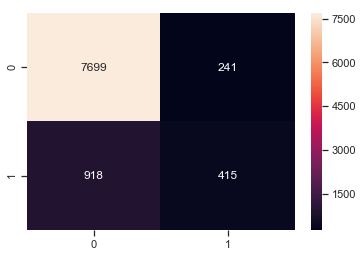

In [481]:
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
# Fit the model on train
logistic_reg_model = LogisticRegression(solver='liblinear')
logistic_reg_model.fit(X_train, y_train)

y_pred = logistic_reg_model.predict(X_test)
confusion_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix, annot=True,fmt='d')

logistic_reg_score = logistic_reg_model.score(X_test, y_test)

from sklearn.metrics import  classification_report
print (classification_report(y_test, y_pred))
logistic_reg_score

              precision    recall  f1-score   support

           0       0.87      0.99      0.93      7940
           1       0.72      0.09      0.16      1333

   micro avg       0.86      0.86      0.86      9273
   macro avg       0.79      0.54      0.54      9273
weighted avg       0.85      0.86      0.82      9273



0.8643373234120565

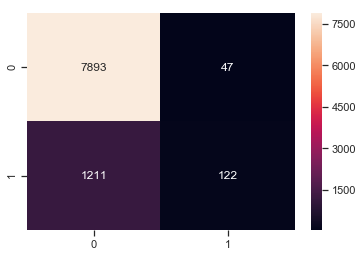

In [482]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

knn_model = KNeighborsClassifier(n_neighbors= 30 , weights = 'uniform', metric='euclidean')
knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)

confusion_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix, annot=True,fmt='d')

knn_score = knn_model.score(X_test, y_test)

from sklearn.metrics import  classification_report
print (classification_report(y_test, y_pred))
knn_score

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      7940
           1       0.65      0.27      0.38      1333

   micro avg       0.87      0.87      0.87      9273
   macro avg       0.77      0.62      0.65      9273
weighted avg       0.85      0.87      0.85      9273

0.6215056755372722


0.8740429203062655

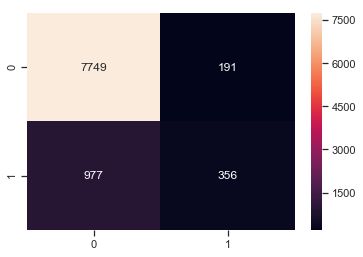

In [524]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier(criterion = 'entropy', random_state = 1, max_depth=5, min_samples_leaf=5)
dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix, annot=True,fmt='d')

dt_score = dt_model.score(X_test, y_test)

from sklearn.metrics import  classification_report
print (classification_report(y_test, y_pred))
from sklearn.metrics import roc_auc_score
print (roc_auc_score(y_test, y_pred))
dt_score

In [484]:
## Calculating feature importance

feat_importance = dt_model.tree_.compute_feature_importances(normalize=False)


feat_imp_dict = dict(zip(X.columns, dt_model.feature_importances_))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.sort_values(by=0, ascending=False)

,0
duration_group_<500,0.396983
poutcome_success,0.310545
housing_yes,0.083734
quarter_Q3,0.078687
previous,0.054086
quarter_Q2,0.017522
duration_group_500-1000,0.015370
age_group_60+,0.012590
pdays_group_400-599,0.011699
campaign,0.003471


              precision    recall  f1-score   support

           0       0.89      0.97      0.93      7940
           1       0.65      0.32      0.43      1333

   micro avg       0.88      0.88      0.88      9273
   macro avg       0.77      0.65      0.68      9273
weighted avg       0.86      0.88      0.86      9273

0.6456814140562848


0.8774937992019842

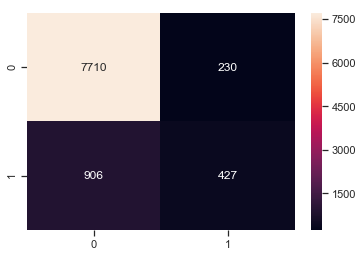

In [523]:
from sklearn.ensemble import RandomForestClassifier

rf_model=RandomForestClassifier(n_estimators = 50, random_state = 1, max_depth=10, 
                                max_features=15, min_samples_split=5, bootstrap='True',criterion='gini')
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix, annot=True,fmt='d')

rf_score = rf_model.score(X_test, y_test)

from sklearn.metrics import  classification_report
print (classification_report(y_test, y_pred))
from sklearn.metrics import roc_auc_score
print (roc_auc_score(y_test, y_pred))
rf_score

In [486]:
feat_imp_dict = dict(zip(X.columns, rf_model.feature_importances_))    
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.sort_values(by=0, ascending=False)

,0
duration_group_<500,0.228802
poutcome_success,0.184266
duration_group_500-1000,0.076868
housing_yes,0.050440
quarter_Q3,0.037244
campaign,0.036966
age_group_60+,0.031552
previous,0.030924
quarter_Q2,0.029772
poutcome_unknown,0.016853


              precision    recall  f1-score   support

           0       0.88      0.98      0.93      7940
           1       0.64      0.17      0.27      1333

   micro avg       0.87      0.87      0.87      9273
   macro avg       0.76      0.58      0.60      9273
weighted avg       0.84      0.87      0.83      9273

0.5775238992367739


0.867141162514828

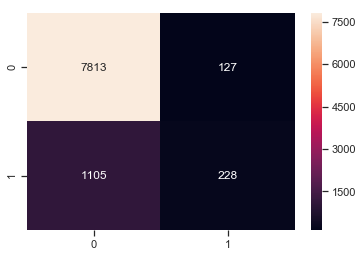

In [522]:
from sklearn.ensemble import AdaBoostClassifier
ab_model = AdaBoostClassifier( n_estimators= 100, learning_rate=0.1, random_state=22)
ab_model.fit(X_train, y_train)

y_pred = ab_model.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix, annot=True,fmt='d')

ab_score = ab_model.score(X_test, y_test)

from sklearn.metrics import  classification_report
print (classification_report(y_test, y_pred))
from sklearn.metrics import roc_auc_score
print (roc_auc_score(y_test, y_pred))
ab_score

In [514]:
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer
from time import time

rf_model=RandomForestClassifier(n_estimators = 50, random_state = 1)

# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")


# specify parameters and distributions to sample from
param_dist = {  "n_estimators" : [10, 50, 100],
                "max_depth": [3, 5, 10, None], 
                "min_samples_split": np.linspace(2, 50, 50, dtype = "int"),  
                "max_features": ["sqrt", "log2",2, 5, 10, 15, None],
                "oob_score": [True],
                "bootstrap": [True],
                "criterion": ["gini", "entropy"]}

scoreFunction = {'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score)}

# run randomized search
n_iter_search = 20
random_search = RandomizedSearchCV(rf_model, 
                                   param_distributions=param_dist,
                                   n_iter=n_iter_search, 
                                   scoring = scoreFunction,               
                                   refit = "AUC",
                                   return_train_score = True,
                                   cv=5, 
                                   iid=False, 
                                   n_jobs=-1)
start = time()
random_search.fit(X_train, y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
random_search.cv_results_




RandomizedSearchCV took 48.64 seconds for 20 candidates parameter settings.


{'mean_fit_time': array([ 2.00065026,  0.56509037,  4.43733406,  5.39238038,  1.02645626,
         1.96893425,  1.10504417, 11.38455329,  0.32173915,  1.53948321,
         1.40304675,  1.52911301,  0.49268155,  0.14521241, 12.49159575,
         0.44321361,  0.49288392,  2.01441483,  0.84992428,  1.13955116]),
 'std_fit_time': array([0.0105358 , 0.00941108, 0.12672006, 0.03685711, 0.02638284,
        0.02172631, 0.04823234, 0.06493389, 0.00555715, 0.08284626,
        0.0927659 , 0.10292709, 0.01589605, 0.0239785 , 0.15065535,
        0.03887512, 0.03973962, 0.04727907, 0.01383906, 0.01717743]),
 'mean_score_time': array([0.11908312, 0.05824461, 0.15797796, 0.14142275, 0.07559757,
        0.23497376, 0.04348464, 0.24833746, 0.02513275, 0.18630061,
        0.04707546, 0.1330421 , 0.06402926, 0.02134156, 0.27247086,
        0.05246086, 0.05305934, 0.14840288, 0.14301705, 0.13264737]),
 'std_score_time': array([0.00240909, 0.00101744, 0.03018792, 0.00930146, 0.00193399,
        0.02207312, 

In [515]:
random_search.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=50,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=True, random_state=1, verbose=0, warm_start=False)

In [516]:
feature_importances = random_search.best_estimator_.feature_importances_
feature_importances
sorted (zip(feature_importances,X.columns),reverse=True)

[(0.22172759615660823, 'duration_group_<500'),
 (0.17471197294644725, 'poutcome_success'),
 (0.05145411213063672, 'campaign'),
 (0.05092008583614796, 'quarter_Q3'),
 (0.050544263684145364, 'housing_yes'),
 (0.03603204270552389, 'previous'),
 (0.025285342695500822, 'age_group_60+'),
 (0.023379373022300885, 'day_group_(7.0, 13.0]'),
 (0.021628130078235296, 'quarter_Q2'),
 (0.019481925291497993, 'day_group_(13.0, 19.0]'),
 (0.01767930514682281, 'quarter_Q4'),
 (0.016672750292372824, 'loan_yes'),
 (0.01513866642299474, 'day_group_(19.0, 25.0]'),
 (0.015075820310845223, 'day_group_(25.0, 31.0]'),
 (0.014714444880022992, 'poutcome_unknown'),
 (0.014276588902954574, 'age_group_<30'),
 (0.01193386766157754, 'balance_group_low balance'),
 (0.011866651522039716, 'marital_married'),
 (0.011728859742557076, 'pdays_group_unknown'),
 (0.011393637792664385, 'contact_telephone'),
 (0.011295919087841215, 'balance_group_no balance'),
 (0.010945797247375441, 'job_blue-collar'),
 (0.01026702620361215, 'ed

              precision    recall  f1-score   support

           0       0.90      0.96      0.93      7940
           1       0.62      0.35      0.45      1333

   micro avg       0.88      0.88      0.88      9273
   macro avg       0.76      0.66      0.69      9273
weighted avg       0.86      0.88      0.86      9273

0.6590314455188105


0.8757683597541249

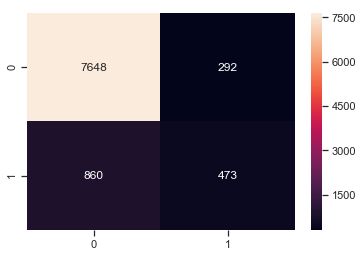

In [521]:
final_model=random_search.best_estimator_

y_pred = final_model.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix, annot=True,fmt='d')

fnal_score = final_model.score(X_test, y_test)

from sklearn.metrics import classification_report
print (classification_report(y_test, y_pred))
from sklearn.metrics import roc_auc_score
print (roc_auc_score(y_test, y_pred))
fnal_score


In [118]:
from sklearn.model_selection import GridSearchCV
rf_model=RandomForestClassifier(n_estimators = 100, random_state = 1)

# use a full grid over all parameters
param_grid = {"n_estimators": [10, 50, 100],
              "max_depth": [3, 5, 10, None],
              "max_features": [2, 5, 10, 15],
              "min_samples_split": [2, 5, 10, 15],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# run grid search
grid_search = GridSearchCV(rf_model, param_grid=param_grid, cv=5, iid=False, n_jobs=-1)
start = time()
grid_search.fit(X_train, y_train)

print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(grid_search.cv_results_['params'])))
report(grid_search.cv_results_)

GridSearchCV took 752.77 seconds for 768 candidate parameter settings.
Model with rank: 1
Mean validation score: 0.877 (std: 0.005)
Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 10, 'max_features': 15, 'min_samples_split': 5, 'n_estimators': 50}

Model with rank: 2
Mean validation score: 0.876 (std: 0.004)
Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': None, 'max_features': 10, 'min_samples_split': 10, 'n_estimators': 100}

Model with rank: 3
Mean validation score: 0.876 (std: 0.004)
Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 10, 'max_features': 15, 'min_samples_split': 10, 'n_estimators': 100}



              precision    recall  f1-score   support

          no       0.90      0.97      0.93      7940
         yes       0.64      0.35      0.45      1333

   micro avg       0.88      0.88      0.88      9273
   macro avg       0.77      0.66      0.69      9273
weighted avg       0.86      0.88      0.86      9273



0.8783565189259139

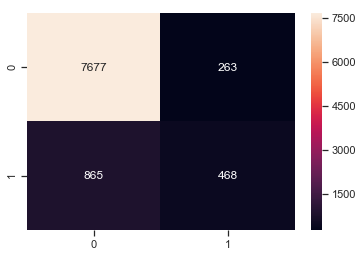

In [119]:
final_model=grid_search.best_estimator_

y_pred = final_model.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix, annot=True,fmt='d')

fnal_score = final_model.score(X_test, y_test)

from sklearn.metrics import classification_report
print (classification_report(y_test, y_pred))
fnal_score


In [120]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances
sorted (zip(feature_importances,X.columns),reverse=True)

[(0.222024315776909, 'duration_group_<500'),
 (0.17328045576792023, 'poutcome_success'),
 (0.07799387082729697, 'pdays'),
 (0.06895784732086822, 'duration_group_500-1000'),
 (0.05836334959638655, 'day'),
 (0.037011629547610794, 'month_mar'),
 (0.03424967303984333, 'housing_yes'),
 (0.03056492449322622, 'month_jun'),
 (0.025836476326689124, 'campaign'),
 (0.0236824735823936, 'age_group_60+'),
 (0.02118325679385823, 'month_sep'),
 (0.020223641098069744, 'previous'),
 (0.01303316373546892, 'month_oct'),
 (0.009458477158059865, 'month_jul'),
 (0.00936299181001397, 'marital_married'),
 (0.009189257979605524, 'month_may'),
 (0.008921221797319818, 'age_group_<30'),
 (0.008061212535385361, 'education_tertiary'),
 (0.007679385181560671, 'month_aug'),
 (0.00740850927962438, 'poutcome_unknown'),
 (0.007287378363556818, 'month_jan'),
 (0.006816289028189427, 'loan_yes'),
 (0.0065946999191876686, 'balance_group_low balance'),
 (0.006574084071086763, 'marital_single'),
 (0.006472289517251844, 'job_st